# Youtube’s automated speech recognition, captioning and sentiment analysis for non-native English speakers.

**Duubar Villalobos Jimenez (CUNY SPS Masters in Data Science) &**

**Dipika Shrestha (CUNY Baruch College Masters in Public & International Affairs)**

New York City, New York.


08.28.2019

# Overview

New York City is a city full of diversity; our residents come from different countries, and many speak a different language other than English as their primary source of communication.

Those who emigrate, find the need of communicating their experiences, struggles, and success to others who like them face similar challenges. A great way of communicating is by recording mostly in English and posting on YouTube for the world to see.

With the advancements in Artificial Intelligence, YouTube has added different services to its platform, one of them by providing automated captioning to their videos. And here is where our proposed idea comes in. 


## Our initial question is as follows: 

**Do automated YouTube captioning affect the sentiment of the message given by a  non-native English speaking person?**

In order to answer this question, we are seeking two different hypotheses:

- **Null hypothesis:** The sentiment does not get affected.

- **Alternate hypothesis:** The sentiment gets affected.


From here, moving forward and based on the answer we get, we might then suggest strategic approaches in order to overcome the effect of the sentiment.


## Goals

Using English as a Lingua Franca and comparing it with YouTube automated captioning; we can then study the communication between non-native English speakers from YouTube videos.


**Our goals could be defined as follows:**
    
1. What problems are encountered by people who required to communicate in English, when English is not their native language?

2. What possible benefits may accrue if a given opportunity is given in order to receive captioned/spoken English messages in their native language?

3. To what extent do misunderstandings occur owing to language differences and how could these confusions ultimately be resolved with the captioned message?



## Specifications

In order to answer these questions, we will work closely by ensuring that the Scientific Method is followed accordingly; we will employ Induction, as it derives new knowledge by generalizing from particular events or objects. Induction has been refined in science to include observing nature, generating a hypothesis from observations, then testing our hypothesis by experiment.


**In order to ensure that our experiments will be completed, we will make use of:**

- YouTube videos.
- YouTube automated captions.
- Python and some relevant libraries.
- R and some related libraries.


**Other tools that might be considered along the way depending on various thoughts are:**

- Amazon Rekognition.
- The IBM Watson Speech to Text service.
- Google Cloud Speech-to-Text.


**CUNY High-Performance Computing Center**

We might need to make use of the CUNY High-Performance Computing Center, for which we need to make acknowledgment as follows:

*The CUNY HPCC is operated by the College of Staten Island and funded, in part, by grants from the City of New York, State of New York, CUNY Research Foundation, and National Science Foundation Grants CNS-0958379, CNS-0855217 and ACI 1126113.*


# Milestones

## Team Building



So far we are in the initial ideas and proposals.
Our team got approvals from both of our advisors.

## Project Proposal


This to be our proposal.

# Extract automated transcript from YouTube video

The following script, is a Python generated code in which we will use in order to extract the automatic generated transcript from youtube.

This is a Python API which allows you to get the transcripts/subtitles for  a given YouTube video. It also works for automatically generated subtitles and it does not require a headless browser, like other selenium based solutions do!

For further learning, visit [https://pypi.org/project/youtube-transcript-api/](https://pypi.org/project/youtube-transcript-api/)

In [1]:
# To supress warning messages
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [3]:
# https://pypi.org/project/youtube-transcript-api/
from youtube_transcript_api import YouTubeTranscriptApi
import numpy as np
import pandas as pd 
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Let's define the StopWords
STOPWORDS = set(STOPWORDS)
STOPWORDS.add("yeah")

# YouTube Example 1

In this example, we have captured the automated transcription generated by YouTube. We then, will compare the original transcript to the automated generated transcript and perform a small introductory analysis in order to gather some initial insights.

In [5]:
# Extract transcript from the video directly from Youtube
# The transcript will return a list with the following column indicators
# "duration", "start", "text"

# Function that extract the YouTube automated transcript
def getYouTubeTranscript(YouTubeID):

    # Extract transcript by following https://pypi.org/project/youtube-transcript-api/
    transcript = YouTubeTranscriptApi.get_transcript(YouTubeID)

    # Convert from Json list into Pandas Data frame
    df_YouTube = pd.DataFrame(transcript)

    # Rename columns
    df_YouTube.columns = ['Duration','Start','Automated']

    # Return transcript
    return(df_YouTube);


Let's extract an example from YouTube.

In [5]:
# Get single YouTube automated transcript
# The link for our first video to test our hypothesis is as follows: 
# https://www.youtube.com/watch?v=a16z2mE_69s
df_YouTube = getYouTubeTranscript('uXJwQNEXuug')

Let's read the orginal transcript

In [6]:
# Import previously manually cleaned transcribed video.
df_Transcript = pd.read_csv( d + "/data/Transcripts/a16z2mE_69s-CorrectTranscript.csv")

Let's take a look at the comparison

In [7]:
# Add correct transcript column next to YouTube automated transcript column
def compareTranscripts(df_YouTube, df_Transcript):
    
    # Joining columns in a single data frame
    df_YouTube['Original'] = df_Transcript['text']

    # Finding out if there's a difference in the text
    df_YouTube['Different'] = np.where((df_YouTube['Automated'] == df_YouTube['Original']), 'No', 'Yes')

    # Comparing the first 5 records.
    #df_YouTube.head()
    return(df_YouTube);

In [8]:
# Let's have a small visualization
df = compareTranscripts(df_YouTube, df_Transcript)

In [9]:
df.head(10)

Duration   Start                                 Automated  \
0     6.270   2.510    hello my name is do Barbie yellow with   
1     6.900   4.819  Jimenez I am a son an immigrant an uncle   
2     4.859   8.780    and a husband currently working in the   
3     6.031  11.719  healthcare industry for about five years   
4     7.441  13.639     and today I'm with Deepika and Anoosh   
5     5.609  17.750     and this is the podcast at the end of   
6     4.019  21.080      the day do bar thank you so much for   
7     3.420  23.359        being in our podcast thank you for   
8     3.871  25.099   inviting and I would also like to thank   
9     3.900  26.779         the CUNY IBM Watson social impact   

                                   Original Different  
0        hello my name is Duubar Villalobos       Yes  
1  Jimenez I am a son an immigrant an uncle        No  
2    and a husband currently working in the        No  
3  healthcare industry for about five years        No  
4        and today I'm with Dipika and Anuz       Yes  
5     and this is the podcast at the end of        No  
6      the day Duubar thank you so much for       Yes  
7        being in our podcast thank you for        No  
8   inviting and I would also like to thank        No  
9         the CUNY IBM Watson social impact        No

Let's visualize the duration frequency.

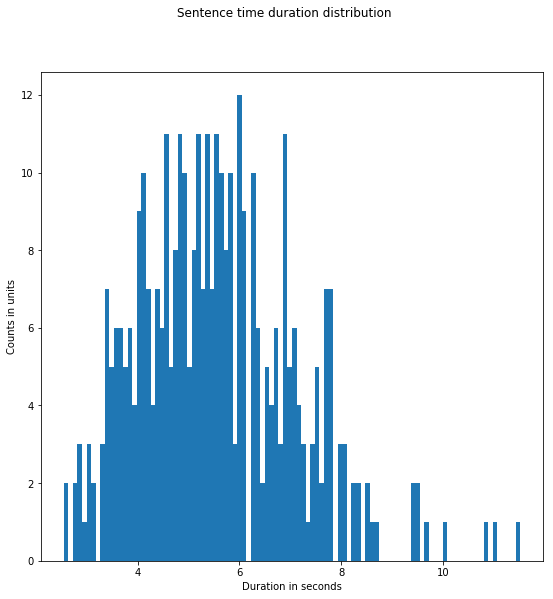

In [10]:
fig, axs = plt.subplots(figsize=(9, 9), sharey=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(df['Duration'], bins=100)
axs.set_xlabel('Duration in seconds')
axs.set_ylabel('Counts in units')
fig.suptitle('Sentence time duration distribution');

Now, let's visualize the differences observed in the transcripts.

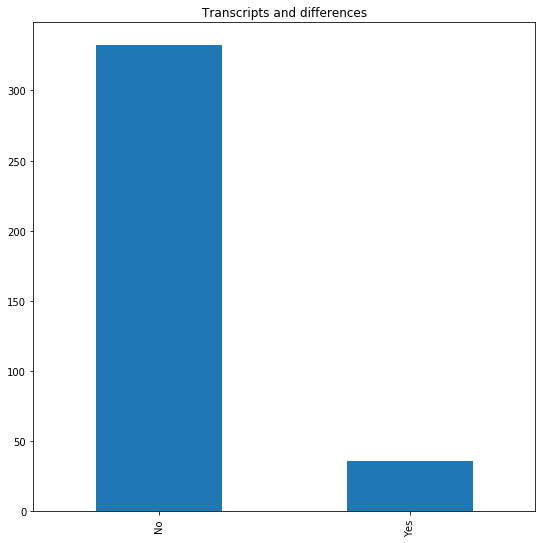

In [11]:
df['Different'].value_counts().plot(kind='bar',
                                    title='Transcripts and differences',
                                    figsize=(9, 9));

From the above plot, we can now start wondering if the question we have formulated, could help us understand if the automated YouTube transcript has any effect in the sentiment of the message.

## Word Cloud

The following procedure will extract a wordcloud from the captionings.

In [12]:
# In order to extract valuable information, we need to make sure our text is converted to string
df['Automated'] = df['Automated'].astype(str)
df['Original'] = df['Original'].astype(str)

In order to extract the core of the message, all the stop words will be removed.

In [24]:
# Example of STOPWORDS
df_StopWords = pd.DataFrame(STOPWORDS).head(10)
df_StopWords.columns = ['STOPWORDS']
df_StopWords.head(10)

STOPWORDS
0      else
1       how
2     while
3       i'm
4   against
5       nor
6      than
7         r
8     their
9       too

Function that extract the WordCloud from a Pandas data frame column.

In [21]:
# Returning Wordcloud captioning fom Pandas Data frame column
def getWordCloud(df, Column):

    ## Join all sentences in the Automated YouTube corpus
    text = ' '.join(df[Column])

    wc = WordCloud(width = 800,
                   height = 800, 
                   background_color ='black',
                   stopwords = STOPWORDS,
                   min_font_size = 10)
    
    wc = wc.generate(text)
    
    return(wc);


Function that plot an already extracted WordCloud from a Pandas data frame column.

In [15]:
# Procedure to plot wordcloud from based on a column
def WordCloudImage(Cloud):
    
    # read the mask image
    # taken from
    # https://www.cleanpng.com/png-immigration-israel-computer-icons-aliyah-family-to-2502696/download-png.html
    
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')    
    plt.imshow(Cloud, 
               interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
    return;

Let's extract the respective WordClouds for the Automated YouTube captioning and the Original captioning.

In [25]:
# Extract WordCloud from YouTube's automatic transcript
wordcloud_YouTube = getWordCloud(df, 'Automated')
# Extract WordCloud from Original Transcript
wordcloud_Original = getWordCloud(df, 'Original')

## Youtube Automated captioning WordCloud

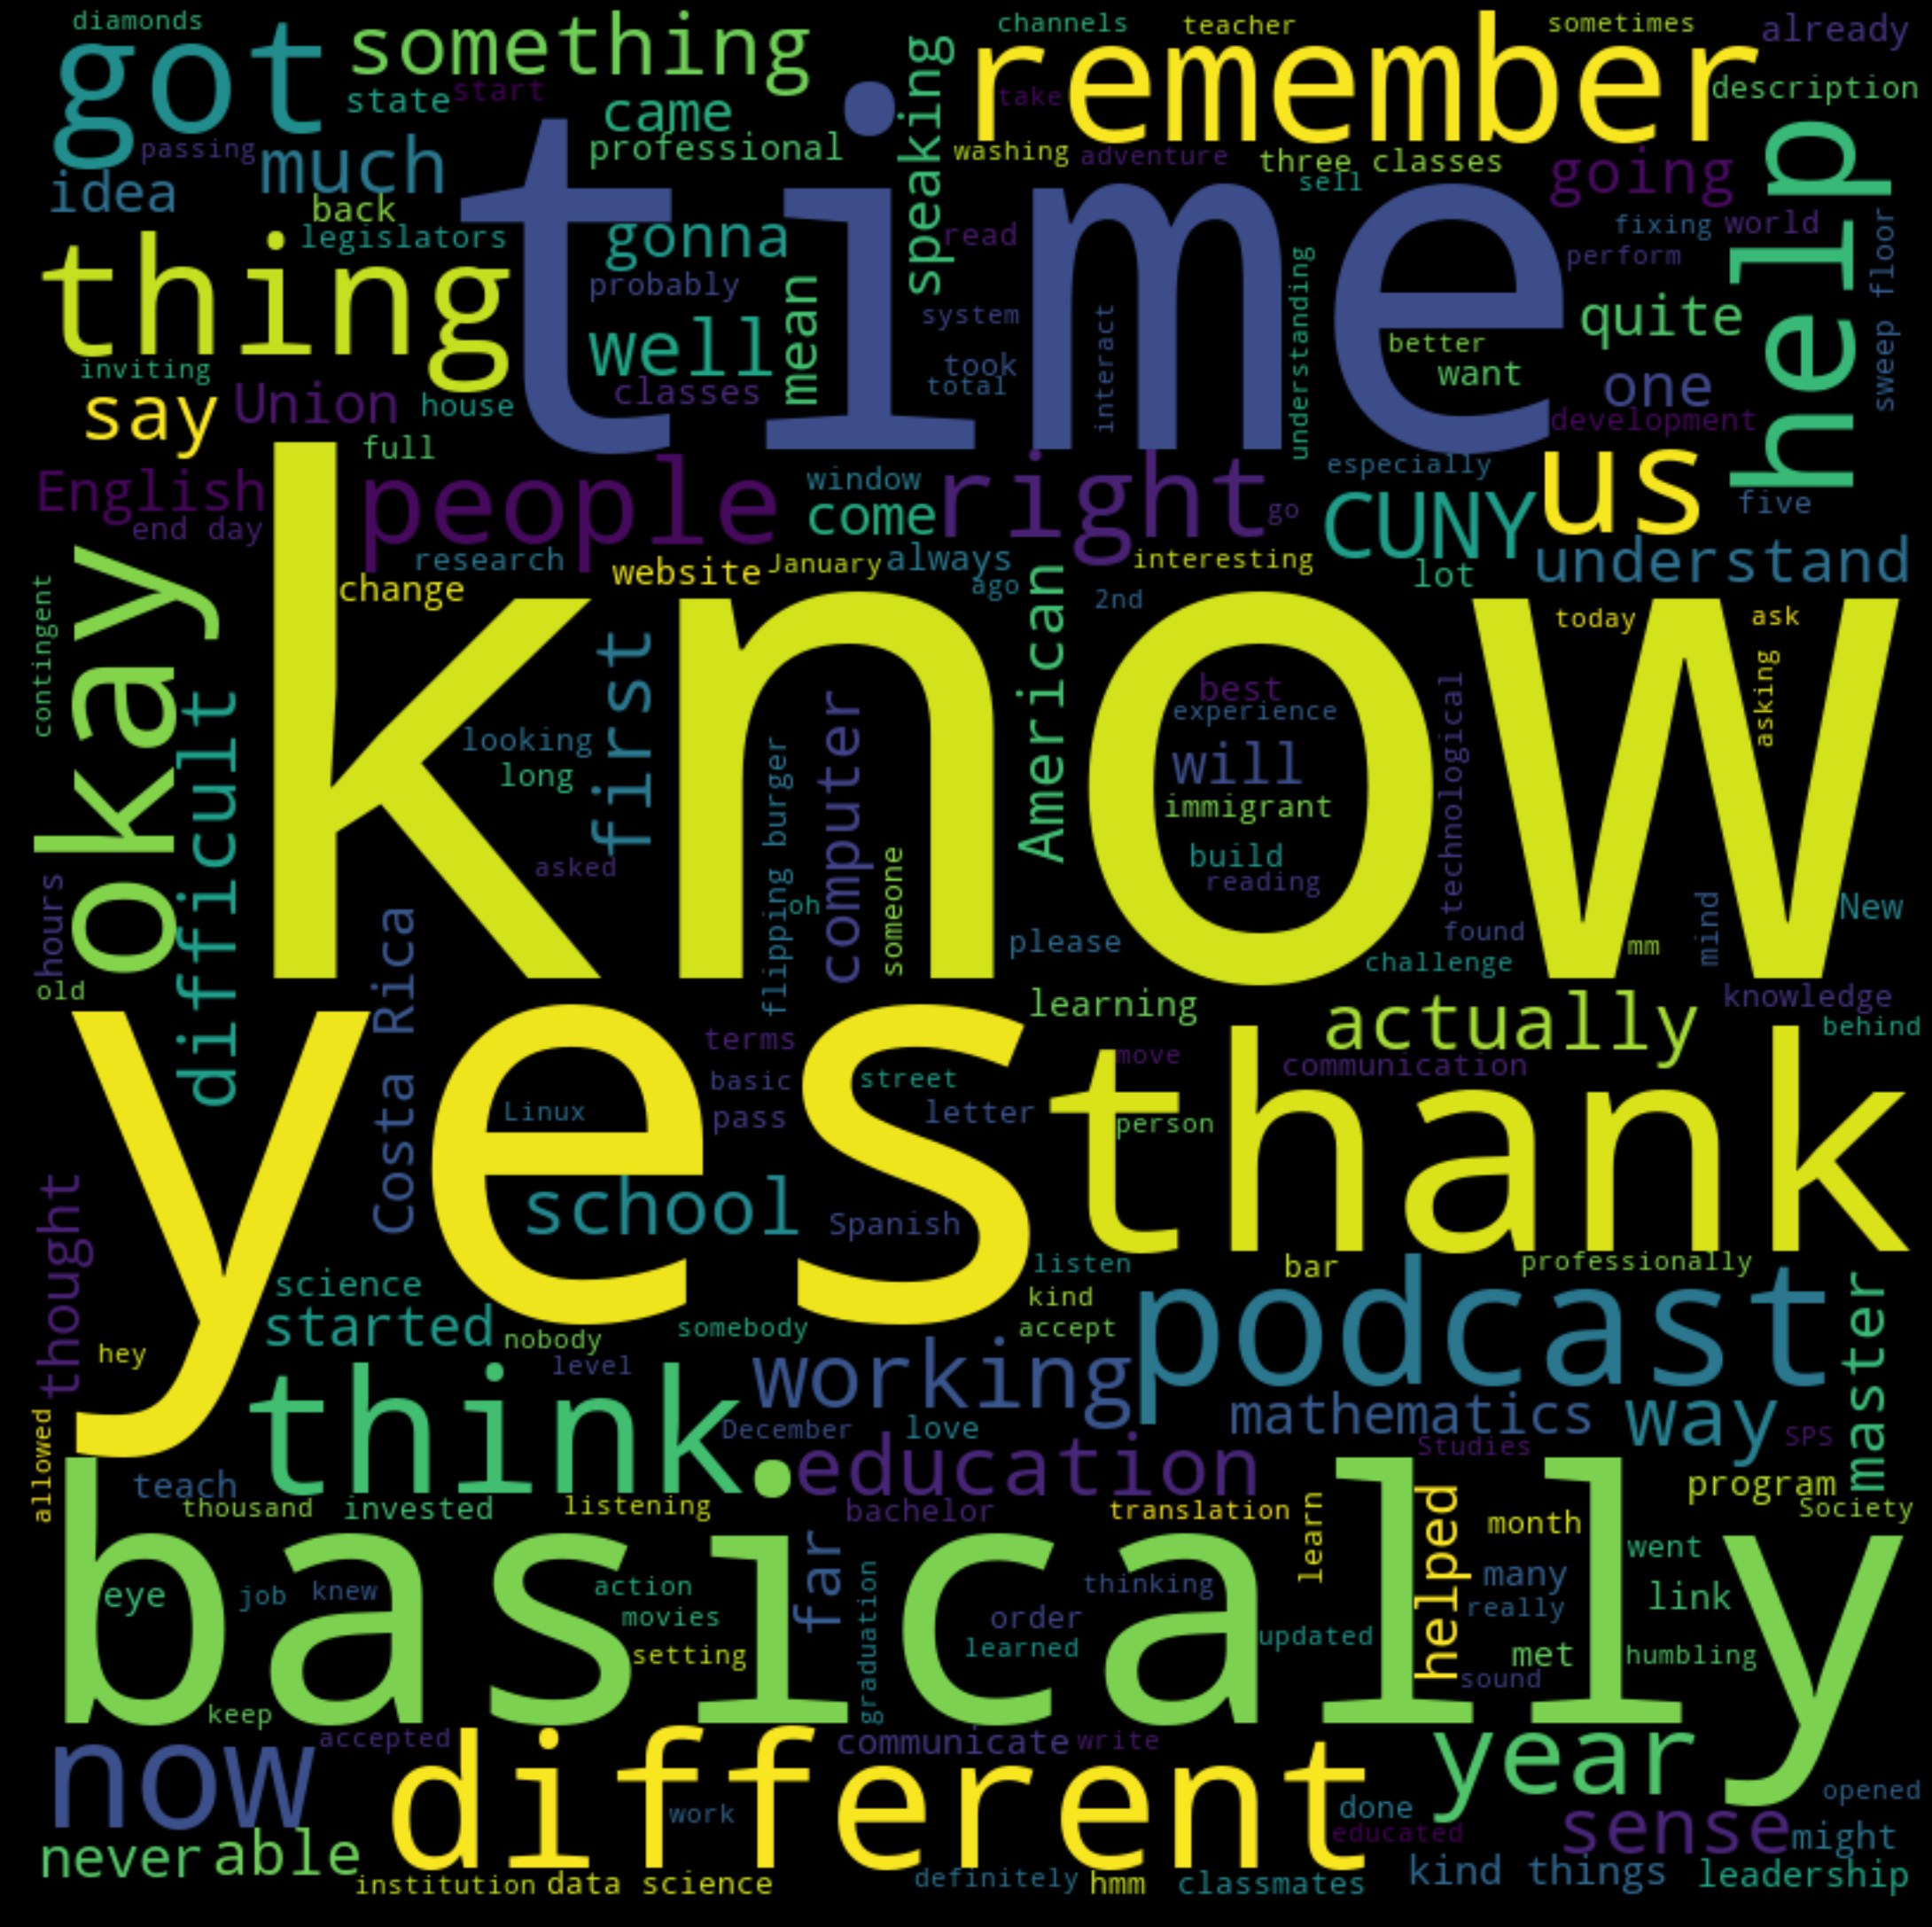

In [26]:
# Return WordCloud for YouTube automated Captioning
WordCloudImage(wordcloud_YouTube)

## Original captioninig WordCloud.

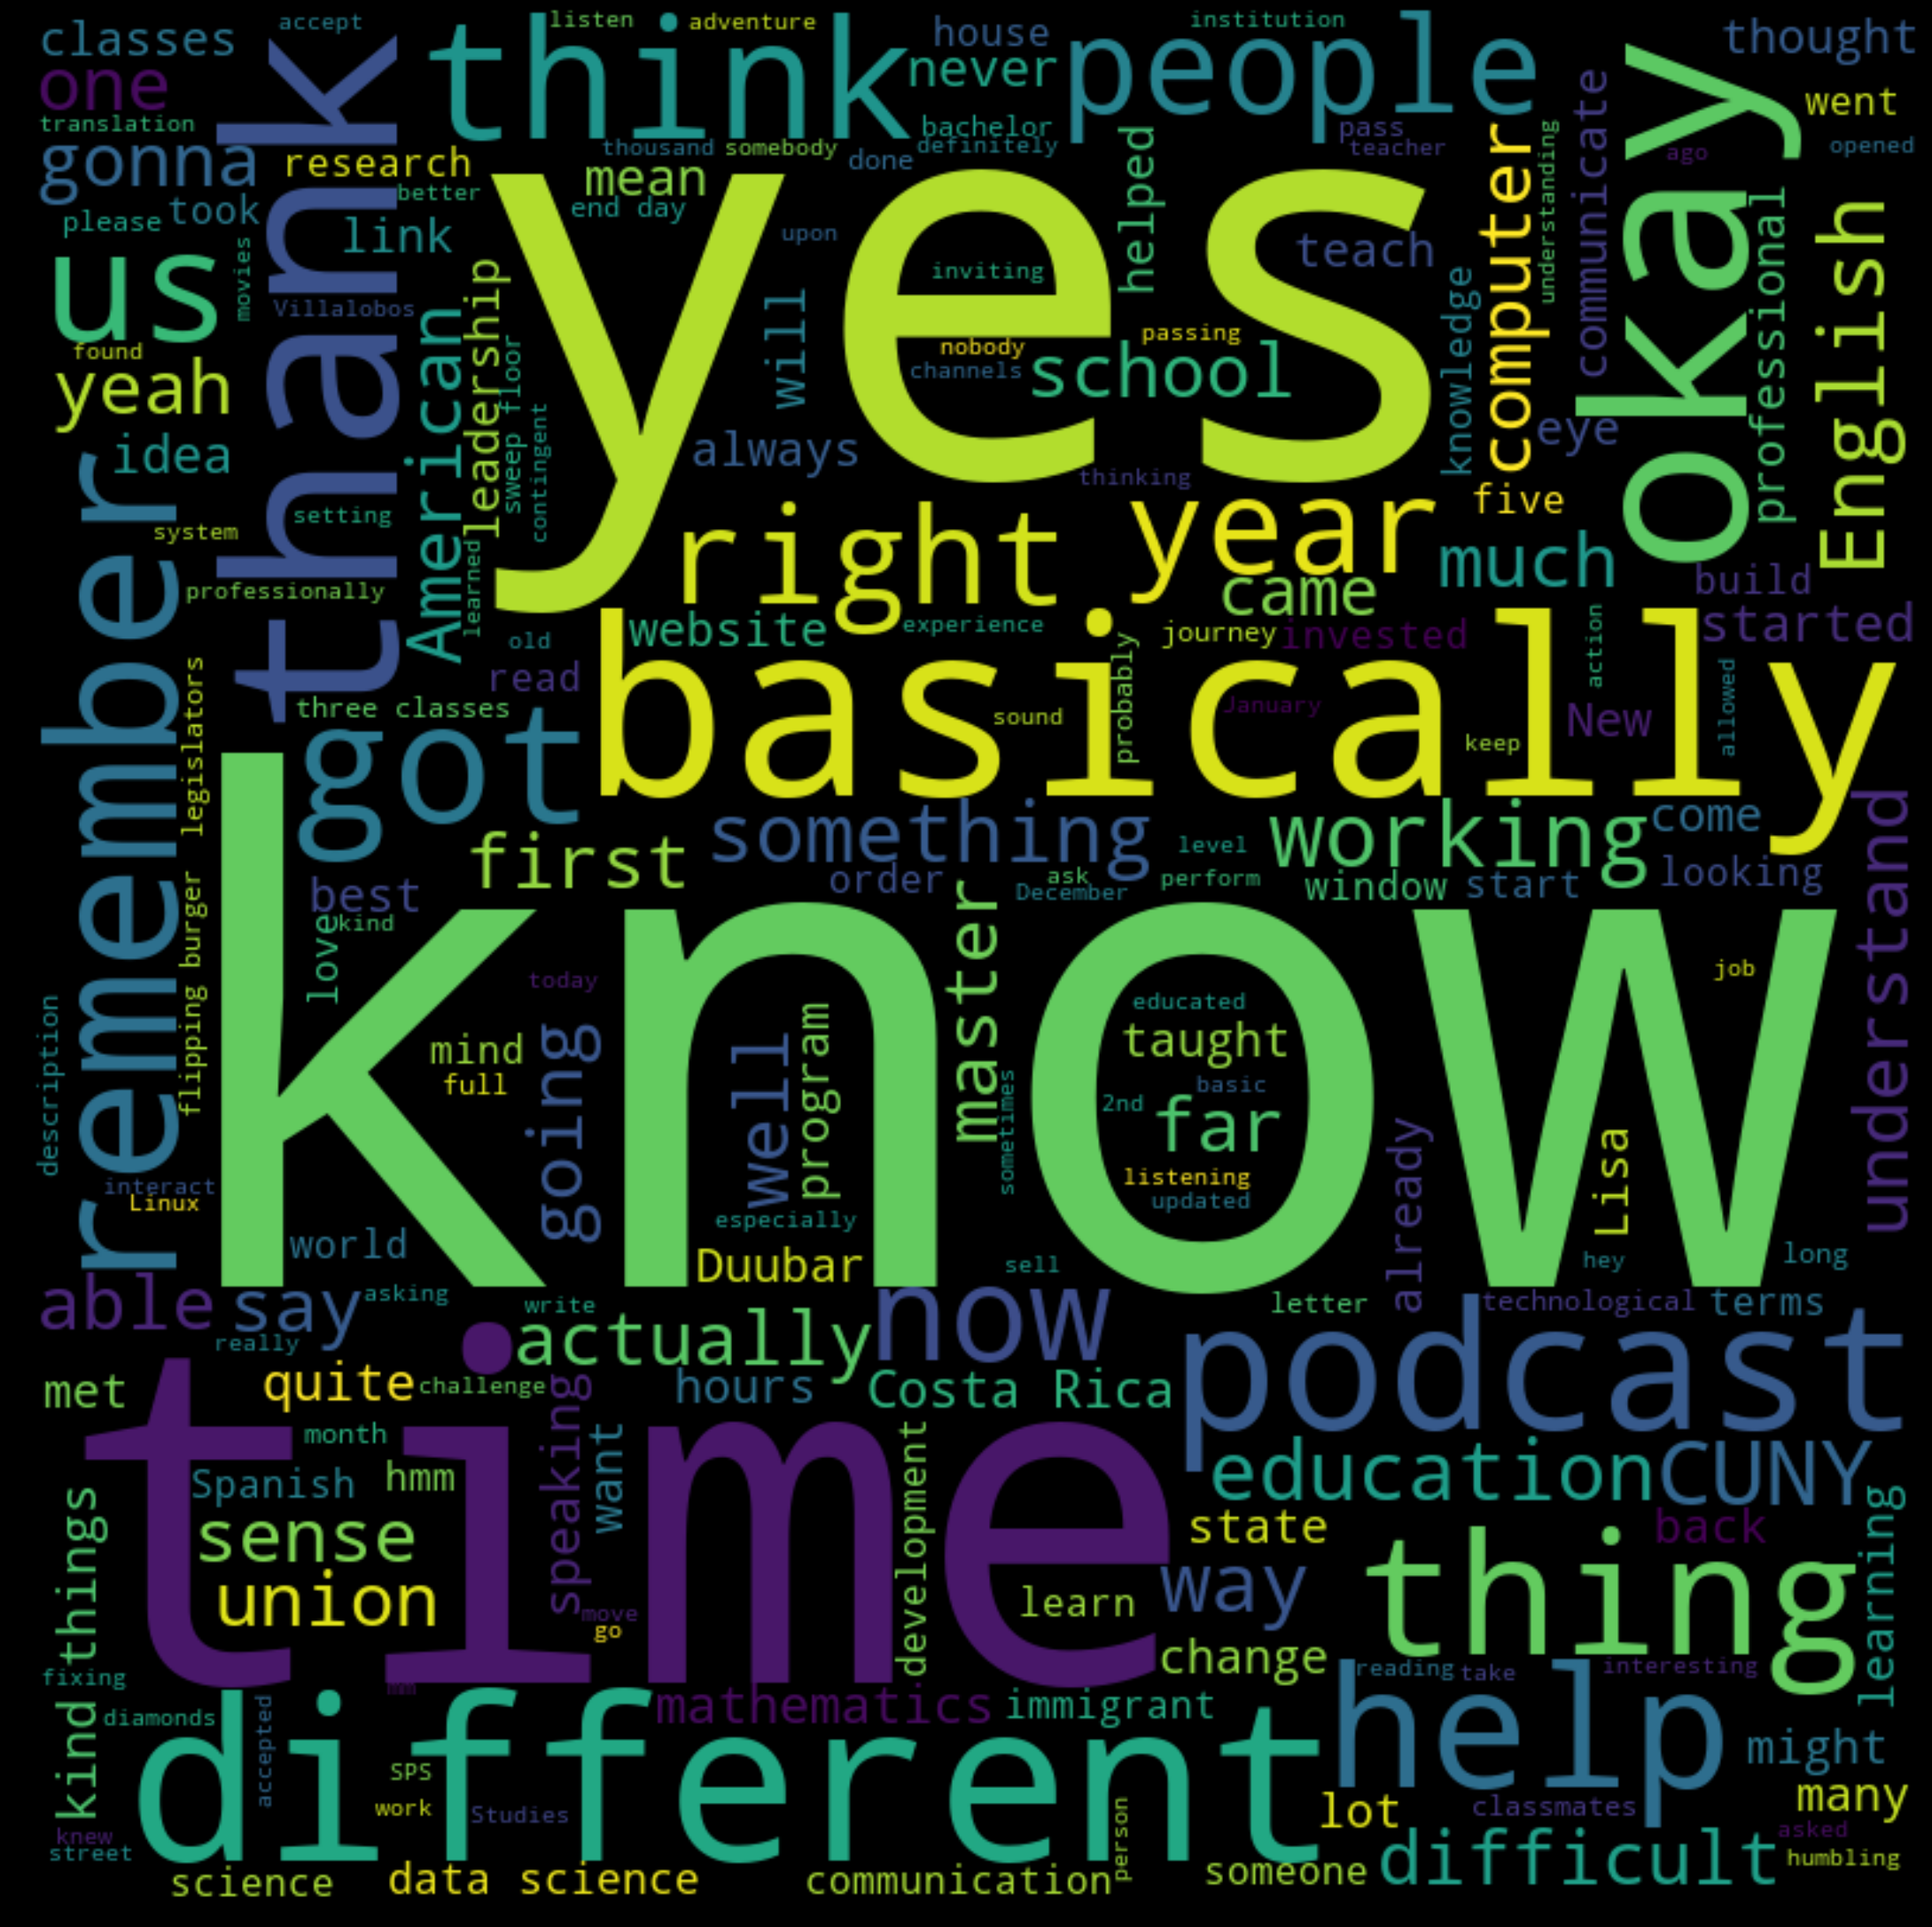

In [17]:
# Return WordCloud for Original Transcription
WordCloudImage(wordcloud_Original)